---
# Tarea 1 Deep Learning
- Integrantes: Matias Aguilera, Jonas Oviedo y Natalia Romero
---

### Importar librerías

In [205]:
import numpy as np
import matplotlib.pyplot as plt

### Función para calcular distribución de clases

In [206]:
def classes_distribution(arr):
    # Calculate the count of TRUE and FALSE
    count_true = np.count_nonzero(arr)
    count_false = arr.size - count_true

    # Calculate the percentage of TRUE and FALSE
    percent_true = (count_true / arr.size) * 100
    percent_false = (count_false / arr.size) * 100

    print(f"TRUE: {count_true} ({percent_true:.2f}%)")
    print(f"FALSE: {count_false} ({percent_false:.2f}%)")

### Implementación de Logistic Regression
La implementación se basa en el articulo de Medium "Logistic Regression From Scratch"



Kushal, K. (Fecha de publicación). Logistic Regression from Scratch. Medium. https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226

In [207]:

class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = self._sigmoid(np.dot(X, self.weights) + self.bias)
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = self._sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred_cls = np.where(y_pred > 0.5, 1, 0)
        return y_pred_cls

    def plot_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.losses, label='Loss')
        plt.title('Loss vs. Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

In [208]:

def lda(X, n_components):
    # Assuming X is already standardized (mean=0, std=1)
    cov_matrix = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_indices = sorted_indices[:n_components]
    linear_discriminants = eigenvectors[:, selected_indices]
    X_lda = np.dot(X, linear_discriminants)

    return X_lda


def pca(X, n_components):
    # 1. Normalización de datos
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # 2. Cálculo de la matriz de covarianza
    covariance_matrix = np.cov(X_normalized, rowvar=False)

    # 3. Cálculo de autovalores y autovectores
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # 4. Selección de componentes principales
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Orden descendente
    selected_indices = sorted_indices[:n_components]
    principal_components = eigenvectors[:, selected_indices]

    # 5. Transformación de datos
    X_transformed = np.dot(X_normalized, principal_components)
    return X_transformed

### Train Dataset

In [209]:


# Cargar datos de entrenamiento y prueba
train_data = np.genfromtxt('train_data.csv', delimiter=',', skip_header=1)
X_train = train[:, :-1]
#X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
y_train = train[:, -1]
classes_distribution(y_train)

TRUE: 1450 (39.40%)
FALSE: 2230 (60.60%)


### Test Dataset

In [210]:
test = np.genfromtxt('test_data.csv', delimiter=',', skip_header=1)
X_test = test[:, :-1]
#X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

### Entrenando el modelo


Aplicando funcion de reduccion de features (PCA)

In [211]:

class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = self._sigmoid(np.dot(X, self.weights) + self.bias)
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = self._sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred_cls = np.where(y_pred > 0.5, 1, 0)
        return y_pred_cls

    def plot_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.losses, label='Loss')
        plt.title('Loss vs. Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

def lda(X, n_components):
    # Assuming X is already standardized (mean=0, std=1)
    cov_matrix = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_indices = sorted_indices[:n_components]
    linear_discriminants = eigenvectors[:, selected_indices]
    X_lda = np.dot(X, linear_discriminants)

    return X_lda



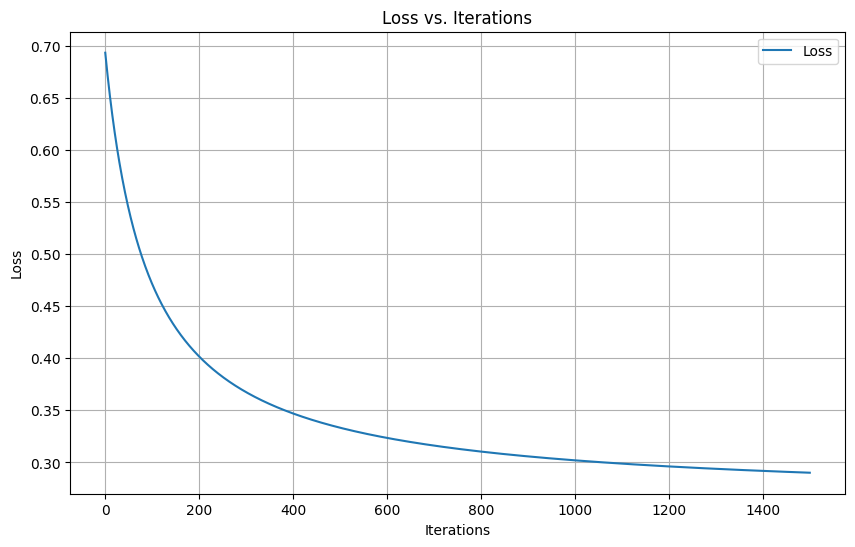

In [217]:

# Cargar datos de entrenamiento y prueba
train_data = np.genfromtxt('train_data.csv', delimiter=',', skip_header=1)
test_data = np.genfromtxt('test_data.csv', delimiter=',', skip_header=1)

# Dividir datos de entrenamiento en X_train y y_train
X_train = train_data[:, :-1]
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

y_train = train_data[:, -1]

# Dividir datos de prueba en X_test (asumiendo que 'test_data' también tiene características)
X_test = test_data
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Aplicar LDA a los datos de entrenamiento y prueba
n_components = 30
X_train_lda = lda(X_train, n_components)
X_test_lda = lda(X_test, n_components)




# Entrenar y probar el modelo de regresión logística con datos transformados (LDA)
logistic_regression = LogisticRegression(learning_rate=0.01, n_iters=1500)
logistic_regression.fit(X_train_lda, y_train)
predictions = logistic_regression.predict(X_test_lda)

# Guardar predicciones en archivo CSV
np.savetxt("submission.csv", predictions, delimiter=",", fmt='%d', header="ID,Class", comments='')

# Plot loss curve
logistic_regression.plot_loss()


### Cálculo de métricas

In [213]:
def calculate_metrics(y_true, y_pred):
    # true positives, false positives, true negatives, and false negatives
    tp = np.sum((y_pred == 1) & (y_true == 1))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))

    # metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }

### K-Fold Cross Validation

In [214]:
def k_fold_split(X, y, k):
    n_samples = len(y)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    fold_sizes = np.full(k, n_samples // k)
    fold_sizes[:n_samples % k] += 1
    current = 0
    folds = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        folds.append((indices[start:stop]))
        current = stop
    return folds

In [215]:
def cross_validation(X, y, k=5, learning_rate=0.09, n_iters=1500):
    folds = k_fold_split(X, y, k)
    scores = []
    for i in range(k):
        train_i = np.hstack([folds[j] for j in range(k) if j != i])
        test_i = folds[i]
        X_train, y_train = X[train_i], y[train_i]
        X_test, y_test = X[test_i], y[test_i]
        lr = LogisticRegression(learning_rate, n_iters)
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        score = calculate_metrics(predictions['Class'],y_test)
        scores.append(score)
        print(f"Fold {i+1}, Score: {score}")
        lr.plot_loss()
        print("----------------")


In [216]:
#cross_validation(X_train,y_train)

<ipython-input-211-ebbbcbb9938e>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices